# 《高级人工智能》课程大作业

姓名：赵路路

学号：2023202210120

## 1. 作业要求

使用以下算法实现手写数字识别任务：

1. KNN 算法，可以使用 sklearn 库，也可以自己实现；

2. 全连接的神经网络模型，可以使用 sklearn 库；

3. 全连接的神经网络模型，仅可使用 numpy 库，手动实现；

4. CNN 卷积神经网络模型，可以使用 sklearn库。

最终使用测试集评估算法的性能，比较各算法的差异，并形成实验报告：

1. 对于 KNN 算法，需设置不同的 K 值，比较结果差异；

2. 对于神经网络模型，需设置不同的学习率、隐层节点数，比较结果差异；

3. 对比上述所有模型的性能差异。

## 2. 数据集介绍

DBRHD (Pen-Based Recognition of Handwritten Digits) 是 UCI 机器学习中心 1998 年 6 月 30 日提供的手写数字数据集，数据来源于 44 位不同书写者，每个数据条项包括 16 维特征及其标签。

1. 训练集：来源于 30 位书写者的 7494 张手写数字特征及其对应标签；

2. 测试集：来源于 14 位书写者的 3498 张手写数字特征及其对应标签。

## 3. KNN 算法

### 3.1 KNN 算法介绍

K 最近邻算法 (K-Nearest Neighbors, KNN) 是一种常用的监督学习算法，用于分类和回归问题。它基于样本之间的距离度量进行预测，即根据最邻近的 K 个训练样本的标签来确定新样本的标签。

KNN算法的基本思想是，如果一个样本在特征空间中的 K 个最近邻居中的大多数属于某个类别，则该样本也属于这个类别。

KNN算法的主要步骤如下：

1. 准备数据集：收集训练样本数据集，包括输入特征和对应的标签。

2. 选择 K 值：确定 K 的取值，即要考虑的最近邻居的数量。K 值的选择会影响算法的性能，通常需要通过交叉验证等方法进行选择。

3. 计算距离：对于一个新的测试样本，计算它与训练样本集中每个样本之间的距离。常用的距离度量方法包括欧氏距离、曼哈顿距离等。

4. 选择最近邻居：根据距离的大小选择与测试样本最近的K个训练样本。

5. 进行预测：对于分类问题，根据 K 个最近邻居的标签进行投票，将得票最多的类别作为测试样本的预测类别。对于回归问题，可以取 K 个最近邻居的平均值作为测试样本的预测值。

KNN算法的优点包括简单易用、无需训练过程、对异常值不敏感等。然而，由于需要计算测试样本与所有训练样本之间的距离，KNN 算法的计算复杂度较高。此外，特征空间的维度较高时，需要进行降维或特征选择等处理。

在应用中，KNN 算法常用于分类问题，特别是在样本分布较为均匀、类别间边界不明显的情况下效果较好。此外，KNN 算法还可以用于异常检测、推荐系统等领域。

### 3.2 KNN 算法 sklearn 库实现

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data_train = np.loadtxt('./pen+based+recognition+of+handwritten+digits/pendigits.tra', delimiter=',')
data_test = np.loadtxt('./pen+based+recognition+of+handwritten+digits/pendigits.tes', delimiter=',')

X_train = data_train[:, :-1]
y_train = data_train[:, -1]
X_test = data_test[:, :-1]
y_test = data_test[:, -1]

print("训练集样本数：" + str(y_train.size))
print("测试集样本数：" + str(y_test.size))

result_accuracy = []
k = [1, 2, 3, 4, 5, 6, 7]

for i in k:
    print("当前 k 值：" + str(i))
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    result_accuracy.append(accuracy)
    print("当前精度：" + str(accuracy))

训练集样本数：7494
测试集样本数：3498
当前 k 值：1
当前精度：0.9774156660949114
当前 k 值：2
当前精度：0.9736992567181246
当前 k 值：3
当前精度：0.9779874213836478
当前 k 值：4
当前精度：0.9765580331618068
当前 k 值：5
当前精度：0.9759862778730704
当前 k 值：6
当前精度：0.9757004002287021
当前 k 值：7
当前精度：0.9754145225843339


<function matplotlib.pyplot.show(close=None, block=None)>

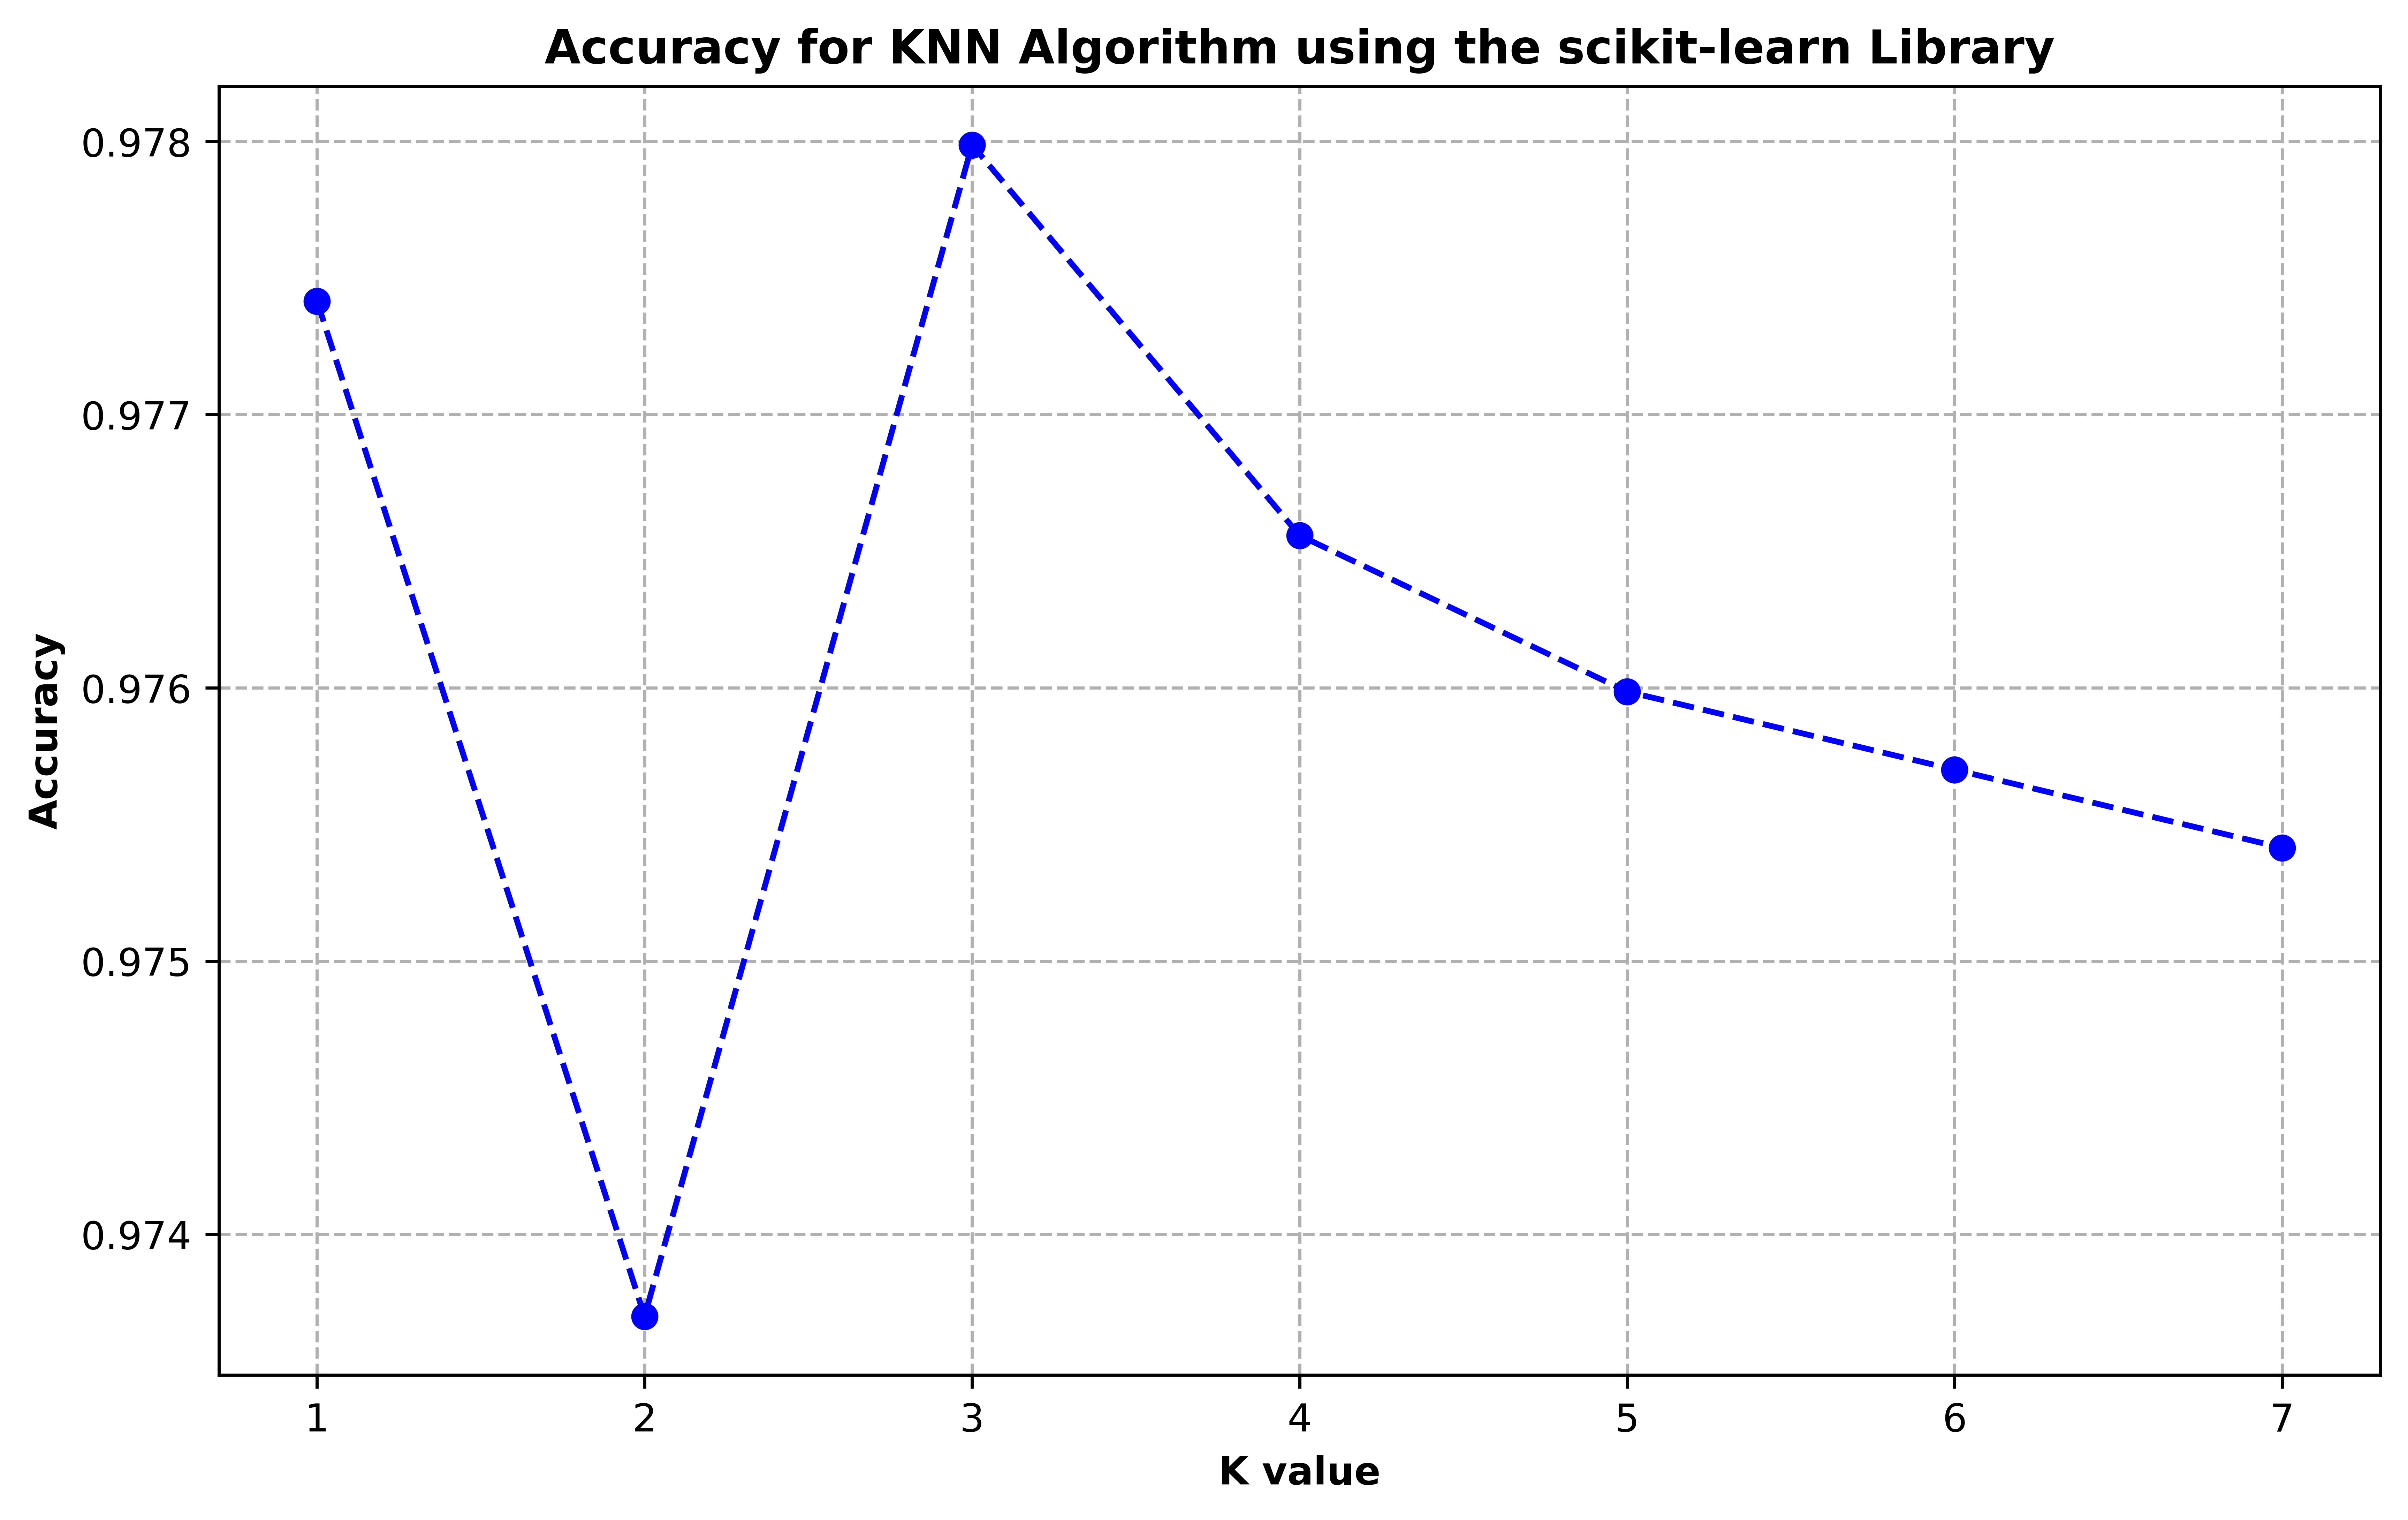

In [2]:
plt.figure(figsize=(10, 6), dpi=800)
plt.rcParams['backend'] = 'Agg'
plt.plot(k, result_accuracy, color='blue', marker='o', linestyle='--', markerfacecolor='blue')
plt.title("Accuracy for KNN Algorithm using the scikit-learn Library", fontweight='bold')
plt.xticks([1, 2, 3, 4, 5, 6, 7])
plt.xlabel("K value", fontweight='bold')
plt.ylabel("Accuracy", fontweight='bold')
plt.grid(True, linestyle='dashed')  # 添加网格线
plt.show

### 3.3 KNN 算法的手动实现

In [3]:
import numpy as np
import math
from collections import Counter
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tqdm import tqdm

def euclidean_distance(p1, p2):
    distance = 0.0
    for i in range(len(p1)):
        distance += (p1[i] - p2[i]) ** 2
    return math.sqrt(distance)

class KNN:
    def __init__(self, k, X_train, y_train):
        self.k = k
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        distances = []
        for i in range(len(self.X_train)):
            distance = euclidean_distance(self.X_train[i], X_test)
            distances.append((distance, self.y_train[i]))
        distances.sort(key=lambda x: x[0])
        k_nearest = distances[:self.k]
        k_nearest_labels = [label for (_, label) in k_nearest]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
data_train = np.loadtxt('./pen+based+recognition+of+handwritten+digits/pendigits.tra', delimiter=',')
data_test = np.loadtxt('./pen+based+recognition+of+handwritten+digits/pendigits.tes', delimiter=',')

X_train = data_train[:, :-1]
y_train = data_train[:, -1]
X_test = data_test[:, :-1]
y_test = data_test[:, -1]

print("训练集样本数：" + str(y_train.size))
print("测试集样本数：" + str(y_test.size))

result_accuracy = []
k = [1, 2, 3, 4, 5, 6, 7]

for i in k:
    print("当前 k 值：" + str(i))
    knn = KNN(k=i, X_train=X_train, y_train=y_train)
    y_pred = []
    for j in tqdm(range(len(X_test)), unit='j'):
        pred = knn.predict(X_test[j])
        y_pred.append(pred)
    accuracy = accuracy_score(y_test, y_pred)
    result_accuracy.append(accuracy)
    print("当前精度：" + str(accuracy))

训练集样本数：7494
测试集样本数：3498
当前 k 值：1


100%|██████████| 3498/3498 [03:18<00:00, 17.66j/s]


当前精度：0.9774156660949114
当前 k 值：2


100%|██████████| 3498/3498 [03:18<00:00, 17.60j/s]


当前精度：0.9774156660949114
当前 k 值：3


100%|██████████| 3498/3498 [03:24<00:00, 17.11j/s]


当前精度：0.978273299028016
当前 k 值：4


100%|██████████| 3498/3498 [03:15<00:00, 17.89j/s]


当前精度：0.9788450543167524
当前 k 值：5


100%|██████████| 3498/3498 [03:18<00:00, 17.59j/s]


当前精度：0.9771297884505432
当前 k 值：6


100%|██████████| 3498/3498 [03:23<00:00, 17.16j/s]


当前精度：0.9777015437392796
当前 k 值：7


100%|██████████| 3498/3498 [03:25<00:00, 17.05j/s]

当前精度：0.9759862778730704


<function matplotlib.pyplot.show(close=None, block=None)>

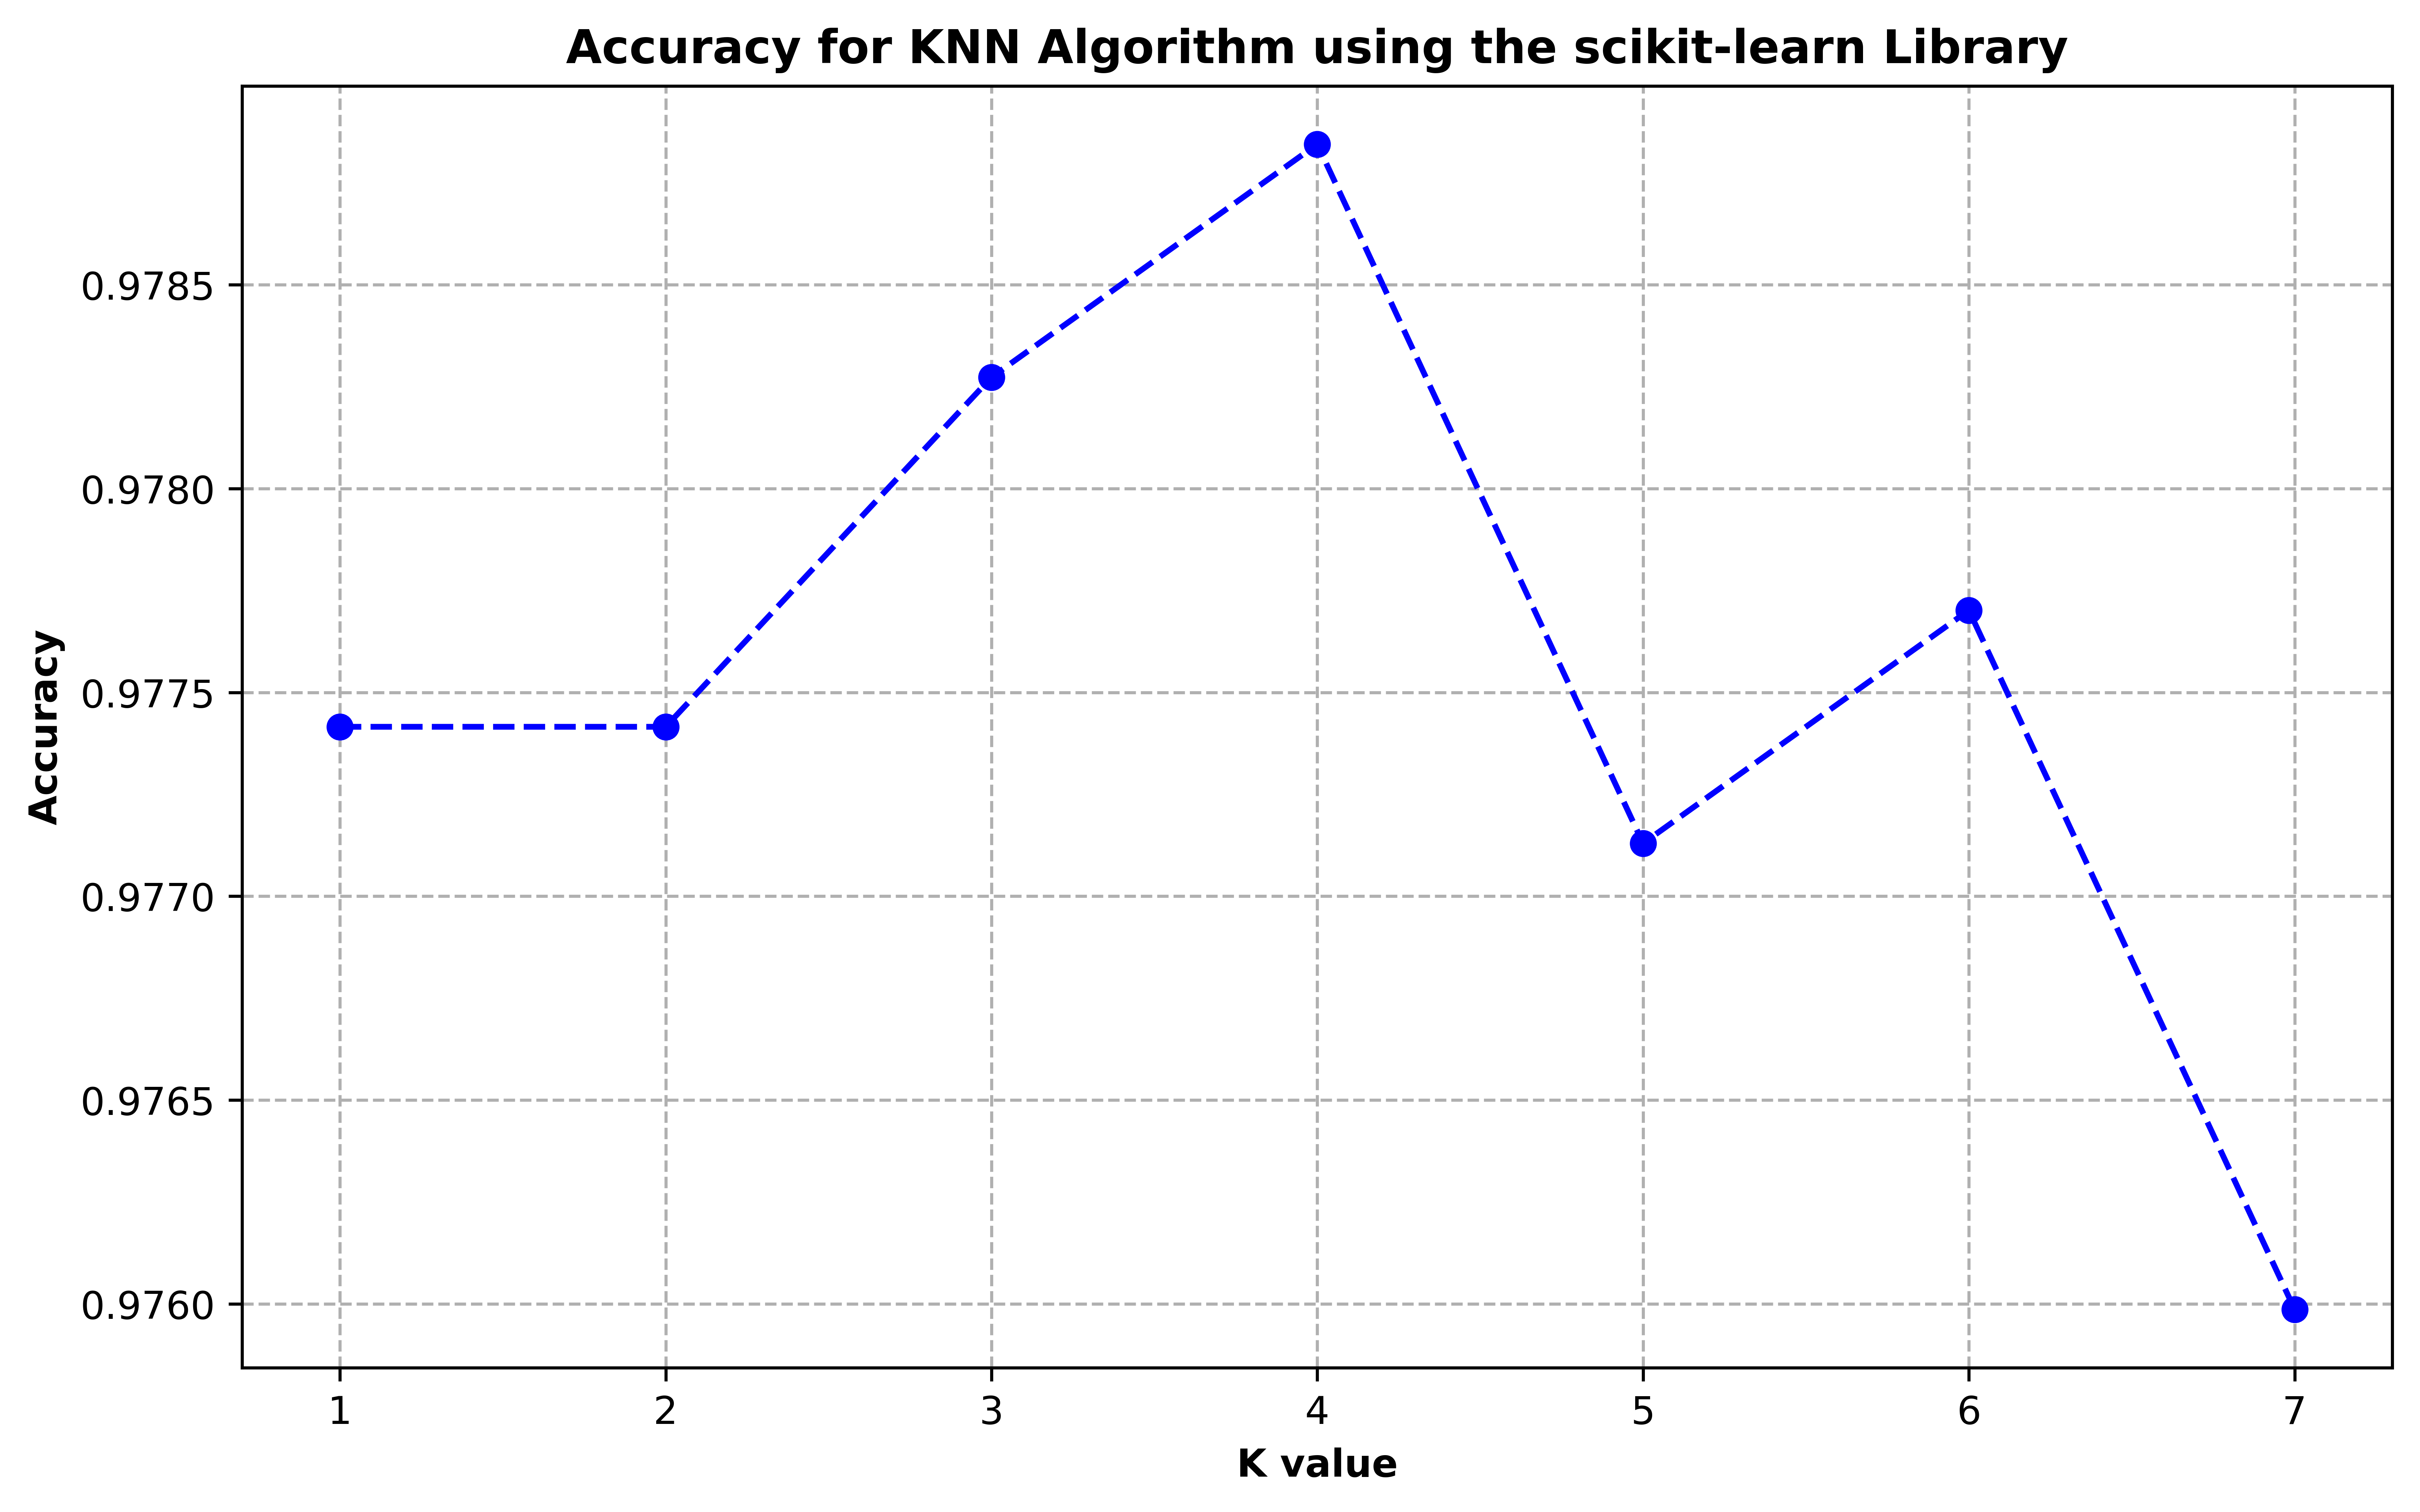

In [4]:
plt.figure(figsize=(10, 6), dpi=800)
plt.rcParams['backend'] = 'Agg'
plt.plot(k, result_accuracy, color='blue', marker='o', linestyle='--', markerfacecolor='blue')
plt.title("Accuracy for KNN Algorithm using the scikit-learn Library", fontweight='bold')
plt.xticks([1, 2, 3, 4, 5, 6, 7])
plt.xlabel("K value", fontweight='bold')
plt.ylabel("Accuracy", fontweight='bold')
plt.grid(True, linestyle='dashed')  # 添加网格线
plt.show

## 4. 全连接神经网络

### 4.1 全连接神经网络介绍

全连接神经网络 (Fully Connected Neural Network, FCNN)，也被称为多层感知机 (Multilayer Perceptron, MLP)，是一种经典的人工神经网络模型。它由多个神经元层组成，其中每个神经元与前一层的所有神经元连接，并将其输入加权求和后通过激活函数进行非线性转换。

下面是全连接神经网络的一般结构：

1. 输入层（Input Layer）：接受输入数据的层。每个输入特征都对应一个输入神经元。

2. 隐藏层（Hidden Layers）：中间层，位于输入层和输出层之间。每个隐藏层包含多个神经元，这些神经元与前一层的所有神经元相连接。

3. 输出层（Output Layer）：产生模型的输出结果。输出层的神经元数量取决于任务的要求，例如二分类问题通常使用一个神经元，多分类问题可能使用多个神经元。

全连接神经网络的训练过程主要包括前向传播和反向传播两个阶段：

1. 前向传播（Forward Propagation）：在前向传播中，输入数据通过网络的各个层，每个神经元将其输入加权求和并应用激活函数。这样，网络逐层计算输出，直到达到输出层，产生模型的预测结果。

2. 反向传播（Backpropagation）：在反向传播中，通过比较模型的预测结果和真实标签，计算损失函数的梯度。然后，梯度从输出层向输入层传播，根据链式法则更新每个神经元的权重，以最小化损失函数。

全连接神经网络在许多领域广泛应用，包括图像分类、语音识别、自然语言处理等。然而，全连接神经网络的参数量随着网络层数和神经元数量的增加而增加，容易导致过拟合问题。为了应对这个问题，可以使用正则化技术、Dropout、批归一化等方法来提高模型的泛化能力。

### 4.2 全连接神经网络 sklearn 库实现

In [5]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data_train = np.loadtxt('./pen+based+recognition+of+handwritten+digits/pendigits.tra', delimiter=',')
data_test = np.loadtxt('./pen+based+recognition+of+handwritten+digits/pendigits.tes', delimiter=',')

X_train = data_train[:, :-1]
y_train = data_train[:, -1]
X_test = data_test[:, :-1]
y_test = data_test[:, -1]

print("训练集样本数：" + str(y_train.size))
print("测试集样本数：" + str(y_test.size))

result_accuracy = [[] for _ in range(4)]
hidden_layer_nerual_unit = [500, 1000, 1500, 2000]
learning_rate = [0.1, 0.01, 0.001, 0.0001]

for j in range(len(learning_rate)):
    print("当前学习率：" + str(learning_rate[j]))
    for i in range(len(hidden_layer_nerual_unit)):
        print("当前隐层神经元数量：" + str(hidden_layer_nerual_unit[i]))
        model = MLPClassifier(hidden_layer_sizes=hidden_layer_nerual_unit[i], activation='relu', solver='adam', random_state=42, learning_rate='constant', learning_rate_init=learning_rate[j], max_iter=250)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        result_accuracy[j].append(accuracy)
        print("当前精度：" + str(accuracy))

训练集样本数：7494
测试集样本数：3498
当前学习率：0.1
当前隐层神经元数量：500
当前精度：0.2058319039451115
当前隐层神经元数量：1000
当前精度：0.411663807890223
当前隐层神经元数量：1500
当前精度：0.18324757004002287
当前隐层神经元数量：2000
当前精度：0.3865065751858205
当前学习率：0.01
当前隐层神经元数量：500
当前精度：0.9711263579188107
当前隐层神经元数量：1000
当前精度：0.9368210405946255
当前隐层神经元数量：1500
当前精度：0.9574042309891366
当前隐层神经元数量：2000
当前精度：0.9636935391652373
当前学习率：0.001
当前隐层神经元数量：500
当前精度：0.9648370497427101
当前隐层神经元数量：1000
当前精度：0.9622641509433962
当前隐层神经元数量：1500
当前精度：0.9631217838765008
当前隐层神经元数量：2000
当前精度：0.9716981132075472
当前学习率：0.0001
当前隐层神经元数量：500
当前精度：0.9742710120068611
当前隐层神经元数量：1000
当前精度：0.9788450543167524
当前隐层神经元数量：1500
当前精度：0.9757004002287021
当前隐层神经元数量：2000
当前精度：0.9791309319611207


<function matplotlib.pyplot.show(close=None, block=None)>

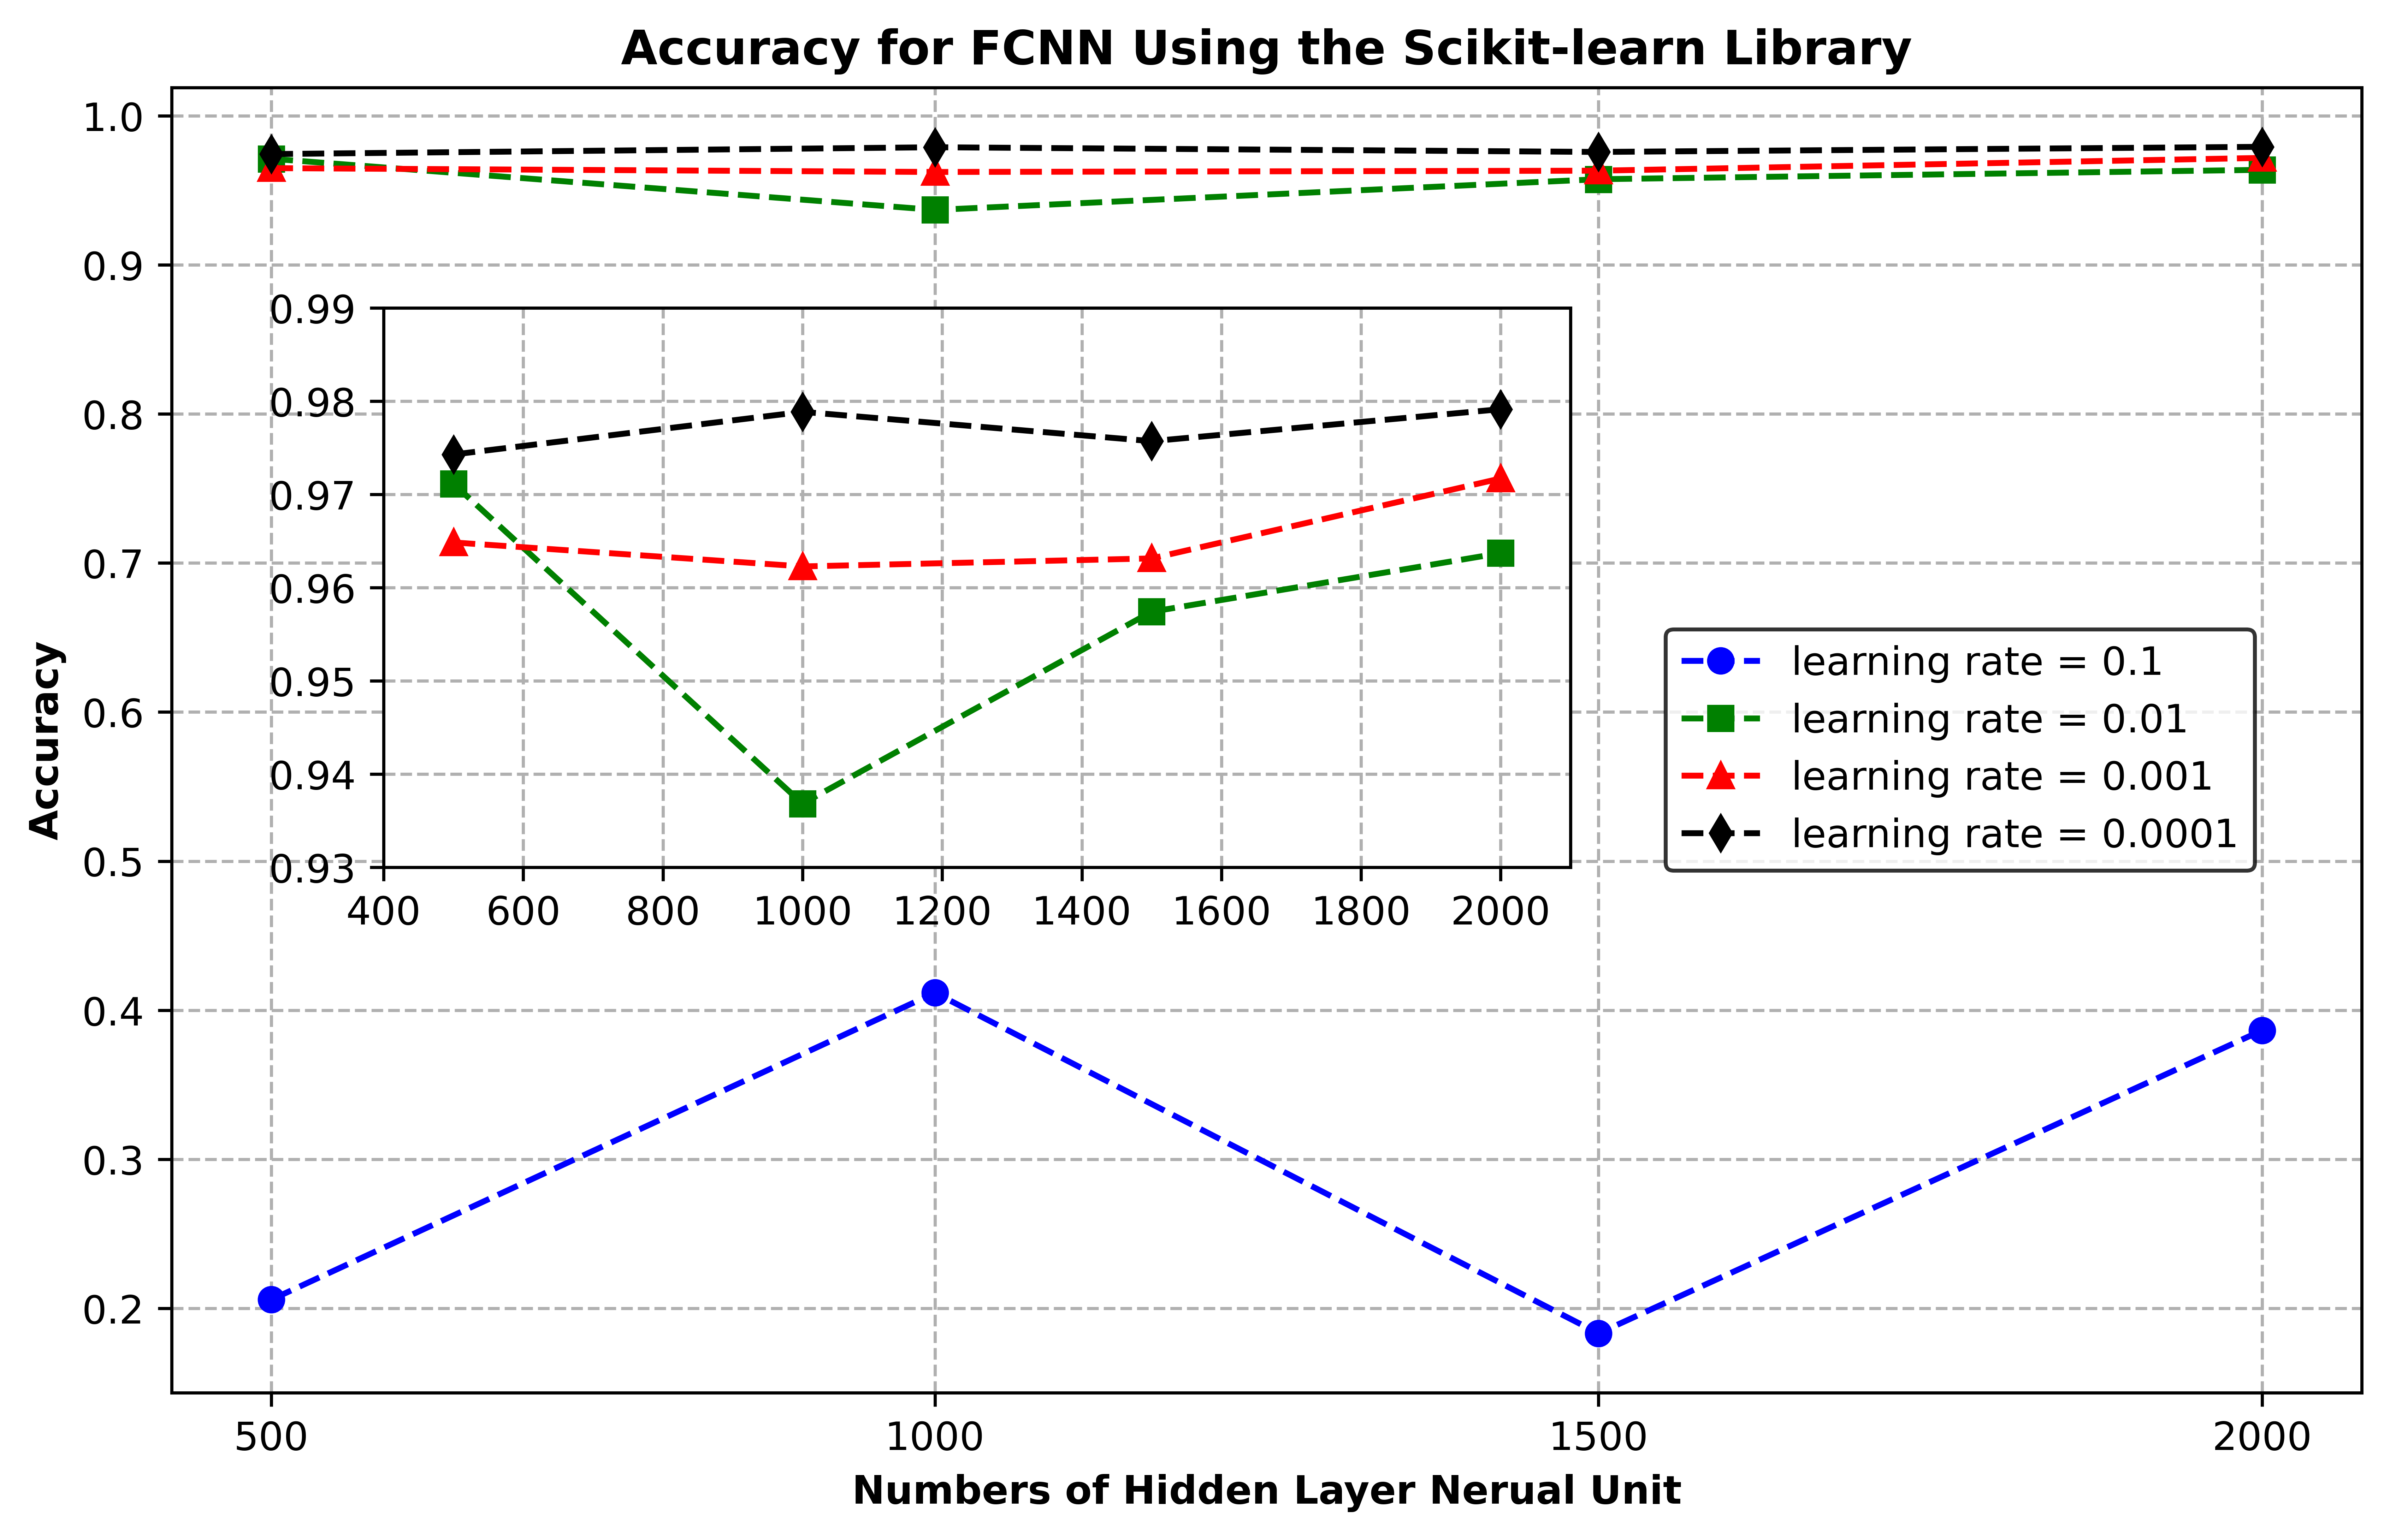

In [6]:
plt.figure(figsize=(10, 6), dpi=800)
plt.rcParams['backend'] = 'Agg'

plt.plot(hidden_layer_nerual_unit, result_accuracy[0], color='blue', marker='o', linestyle='--', markerfacecolor='blue', label='learning rate = 0.1')
plt.plot(hidden_layer_nerual_unit, result_accuracy[1], color='green', marker='s', linestyle='--', markerfacecolor='green', label='learning rate = 0.01')
plt.plot(hidden_layer_nerual_unit, result_accuracy[2], color='red', marker='^', linestyle='--', markerfacecolor='red', label='learning rate = 0.001')
plt.plot(hidden_layer_nerual_unit, result_accuracy[3], color='black', marker='d', linestyle='--', markerfacecolor='black', label='learning rate = 0.0001')
plt.title("Accuracy for FCNN Using the Scikit-learn Library", fontweight='bold')
plt.xticks([500, 1000, 1500, 2000])
plt.xlabel("Numbers of Hidden Layer Nerual Unit", fontweight='bold')
plt.ylabel("Accuracy", fontweight='bold')
plt.grid(True, linestyle='dashed')  # 添加网格线
plt.legend(frameon=True, edgecolor='black', bbox_to_anchor=(0.96, 0.6))
# 设置局部放大区域
zoom_x = (400, 2100)  # x 轴放大范围
zoom_y = (0.93, 0.99)  # y 轴放大范围

# 创建一个新的坐标系，用于绘制局部放大区域
ax_zoom = plt.axes([0.2, 0.42, 0.42, 0.33])  # 设置新坐标系的位置和大小
ax_zoom.plot(hidden_layer_nerual_unit, result_accuracy[0], color='blue', marker='o', linestyle='--', markerfacecolor='blue', label='learning rate = 0.1')
ax_zoom.plot(hidden_layer_nerual_unit, result_accuracy[1], color='green', marker='s', linestyle='--', markerfacecolor='green', label='learning rate = 0.01')
ax_zoom.plot(hidden_layer_nerual_unit, result_accuracy[2], color='red', marker='^', linestyle='--', markerfacecolor='red', label='learning rate = 0.001')
ax_zoom.plot(hidden_layer_nerual_unit, result_accuracy[3], color='black', marker='d', linestyle='--', markerfacecolor='black', label='learning rate = 0.0001')
ax_zoom.set_xlim(zoom_x)  # 设置局部放大区域的 x 轴范围
ax_zoom.set_ylim(zoom_y)  # 设置局部放大区域的 y 轴范围
ax_zoom.grid(True, linestyle='dashed')  # 添加网格线

plt.show

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, max_iter=500, batch_size=200):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.weights1 = None
        self.biases1 = None
        self.weights2 = None
        self.biases2 = None

    def initialize_parameters(self):
        np.random.seed(0)
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
        self.biases1 = np.zeros((1, self.hidden_size))
        self.weights2 = np.random.randn(self.hidden_size, self.output_size)
        self.biases2 = np.zeros((1, self.output_size))

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def forward_propagation(self, X):
        Z1 = np.dot(X, self.weights1) + self.biases1
        A1 = self.sigmoid(Z1)
        Z2 = np.dot(A1, self.weights2) + self.biases2
        A2 = self.sigmoid(Z2)
        return A1, A2

    def backward_propagation(self, X, y, A1, A2):
        m = X.shape[0]
        dZ2 = A2 - y
        dW2 = np.dot(A1.T, dZ2) / m
        dB2 = np.mean(dZ2, axis=0, keepdims=True)
        dZ1 = np.dot(dZ2, self.weights2.T) * A1 * (1 - A1)
        dW1 = np.dot(X.T, dZ1) / m
        dB1 = np.mean(dZ1, axis=0, keepdims=True)
        return dW1, dB1, dW2, dB2

    def update_parameters(self, dW1, dB1, dW2, dB2):
        self.weights1 -= self.learning_rate * dW1
        self.biases1 -= self.learning_rate * dB1
        self.weights2 -= self.learning_rate * dW2
        self.biases2 -= self.learning_rate * dB2

    def train(self, X, y):
        self.initialize_parameters()
        num_samples = X.shape[0]

        for _ in range(self.max_iter):
            for batch_start in range(0, num_samples, self.batch_size):
                batch_end = batch_start + self.batch_size
                X_batch = X[batch_start:batch_end]
                y_batch = y[batch_start:batch_end]

                A1, A2 = self.forward_propagation(X_batch)
                dW1, dB1, dW2, dB2 = self.backward_propagation(X_batch, y_batch, A1, A2)
                self.update_parameters(dW1, dB1, dW2, dB2)

    def predict(self, X):
        _, A2 = self.forward_propagation(X)
        y_pred = np.argmax(A2, axis=1)
        return y_pred
    
data_train = np.loadtxt('./pen+based+recognition+of+handwritten+digits/pendigits.tra', delimiter=',')
data_test = np.loadtxt('./pen+based+recognition+of+handwritten+digits/pendigits.tes', delimiter=',')

X_train = data_train[:, :-1]
y_train = data_train[:, -1]
encoder = OneHotEncoder(sparse=False, categories='auto')
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
X_test = data_test[:, :-1]
y_test = data_test[:, -1]

print("训练集样本数：" + str(y_train.size))
print("测试集样本数：" + str(y_test.size))

result_accuracy = [[] for _ in range(4)]
hidden_layer_neural_units = [500, 1000, 1500, 2000]
learning_rates = [0.1, 0.01, 0.001, 0.0001]

for j in range(len(learning_rate)):
    print("当前学习率：" + str(learning_rate[j]))
    for i in range(len(hidden_layer_nerual_unit)):
        print("当前隐层神经元数量：" + str(hidden_layer_nerual_unit[i]))
        output_size = y_train_encoded.shape[1]
        model = NeuralNetwork(X_train.shape[1], hidden_layer_neural_units[i], output_size, learning_rate=learning_rate[j], max_iter=2000, batch_size=200)
        model.train(X_train, y_train_encoded)
        y_pred = model.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        result_accuracy[j].append(accuracy)
        print("当前精度：" + str(accuracy))


In [ ]:
plt.figure(figsize=(10, 6), dpi=800)
plt.rcParams['backend'] = 'Agg'

plt.plot(hidden_layer_nerual_unit, result_accuracy[0], color='blue', marker='o', linestyle='--', markerfacecolor='blue', label='learning rate = 0.1')
plt.plot(hidden_layer_nerual_unit, result_accuracy[1], color='green', marker='s', linestyle='--', markerfacecolor='green', label='learning rate = 0.01')
plt.plot(hidden_layer_nerual_unit, result_accuracy[2], color='red', marker='^', linestyle='--', markerfacecolor='red', label='learning rate = 0.001')
plt.plot(hidden_layer_nerual_unit, result_accuracy[3], color='black', marker='d', linestyle='--', markerfacecolor='black', label='learning rate = 0.0001')
plt.title("Accuracy for FCNN Using the Scikit-learn Library", fontweight='bold')
plt.xticks([500, 1000, 1500, 2000])
plt.xlabel("Numbers of Hidden Layer Nerual Unit", fontweight='bold')
plt.ylabel("Accuracy", fontweight='bold')
plt.grid(True, linestyle='dashed')  # 添加网格线
plt.legend(frameon=True, edgecolor='black')

plt.show